In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset - Subway delay data set with outliers (Min Delay greater than 30) removed

In [3]:
df = pd.read_csv('Toronto-Subway-Delay-Jan-2014-Jun-2021 removed_above_30.csv')
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,1/1/2014,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
1,1/1/2014,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
2,1/1/2014,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
3,1/1/2014,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
4,1/1/2014,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174
...,...,...,...,...,...,...,...,...,...,...
143135,6/30/2021,1:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143136,6/30/2021,6:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143137,6/30/2021,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143138,6/30/2021,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


## Add column 'Delayed' that contains boolean value for when a train is delayed or not

In [4]:
df['Delayed'] = df['Min Delay'] > 0
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delayed
0,1/1/2014,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,True
1,1/1/2014,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,False
2,1/1/2014,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,True
3,1/1/2014,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,True
4,1/1/2014,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,False
...,...,...,...,...,...,...,...,...,...,...,...
143135,6/30/2021,1:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,False
143136,6/30/2021,6:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,False
143137,6/30/2021,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,False
143138,6/30/2021,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,True


## Yellow lines in this heatmap show the NaN values in the dataset


<AxesSubplot:>

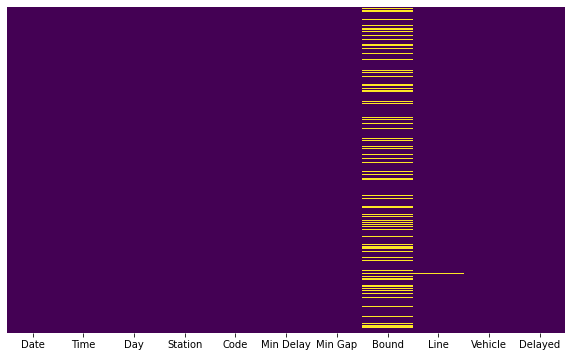

In [237]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

## Drop the 'Bound' column that contains 22.5% NaN values

In [5]:
df = df.drop(['Bound'], axis=1)
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Line,Vehicle,Delayed
0,1/1/2014,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,BD,5001,True
1,1/1/2014,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,YU,0,False
2,1/1/2014,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,BD,5116,True
3,1/1/2014,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,YU,5386,True
4,1/1/2014,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,BD,5174,False
...,...,...,...,...,...,...,...,...,...,...
143135,6/30/2021,1:23,Wednesday,ST CLAIR STATION,MUIS,0,0,YU,0,False
143136,6/30/2021,6:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,SHP,0,False
143137,6/30/2021,12:40,Wednesday,LESLIE STATION,MUIS,0,0,SHP,0,False
143138,6/30/2021,20:50,Wednesday,LESLIE STATION,MUTD,9,14,SHP,6171,True


In [239]:
df.shape

(143140, 10)

## Drop remaining NaN columns

In [6]:
df = df.dropna()
df.shape

(142595, 10)

In [241]:
df.isna().sum()

Date         0
Time         0
Day          0
Station      0
Code         0
Min Delay    0
Min Gap      0
Line         0
Vehicle      0
Delayed      0
dtype: int64

## Preprocessing - Label Encoder for categorical variables

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Date'] = label_encoder.fit_transform(df['Date'])
df['Time'] = label_encoder.fit_transform(df['Time'])
df['Day'] = label_encoder.fit_transform(df['Day'])
df['Station'] = label_encoder.fit_transform(df['Station'])
df['Code'] = label_encoder.fit_transform(df['Code'])
df['Line'] = label_encoder.fit_transform(df['Line'])
df['Delayed'] = label_encoder.fit_transform(df['Delayed'])
df.head()

C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Line,Vehicle,Delayed
0,0,966,6,206,181,3,7,39,5001,1
1,0,1000,6,417,91,0,0,55,0,0
2,0,1030,6,296,181,3,8,39,5116,1
3,0,1040,6,27,101,5,10,55,5386,1
4,0,1049,6,106,95,0,0,39,5174,0


In [8]:
# Define X, y

X = df.drop(['Delayed'], axis =1)
y = df['Delayed']

In [253]:
X

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Line,Vehicle
0,0,966,6,206,181,3,7,39,5001
1,0,1000,6,417,91,0,0,55,0
2,0,1030,6,296,181,3,8,39,5116
3,0,1040,6,27,101,5,10,55,5386
4,0,1049,6,106,95,0,0,39,5174
...,...,...,...,...,...,...,...,...,...
143135,2045,683,6,463,90,0,0,55,0
143136,2045,1199,6,516,93,0,0,51,0
143137,2045,220,6,317,90,0,0,51,0
143138,2045,770,6,317,103,9,14,51,6171


In [245]:
y

0         1
1         0
2         1
3         1
4         0
         ..
143135    0
143136    0
143137    0
143138    1
143139    1
Name: Delayed, Length: 142595, dtype: int64

In [257]:
feature_name = list(X.columns)
num_feats = 6

## Feature Selection

In [256]:
# Feature Selection - Pearson Correlation

cor_list = []
feature_name = X.columns.tolist()
# calculate the correlation with y for each feature
for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0,1]
    cor_list.append(cor)
    num_feats = 9
cor_list = [0if np.isnan(i) else i for i in cor_list]
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]
cor_feature,cor_support, cor_list
pd.DataFrame({"feature":cor_feature, 'cor_value': cor_list})

,feature,cor_value
0,Time,-0.012937
1,Day,-0.000879
2,Date,-0.002701
3,Station,-0.031392
4,Line,-0.070841
5,Code,0.760552
6,Vehicle,0.856530
7,Min Delay,0.039326
8,Min Gap,0.307729


In [258]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

In [259]:
# Feature Selection - Chi squared

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def chi_squared_selector(X, y, num_feats):
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature

In [260]:
chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
print(str(len(chi_feature)), 'selected features')

6 selected features


In [261]:
chi_feature

['Station', 'Code', 'Min Delay', 'Min Gap', 'Line', 'Vehicle']

In [70]:
# Feature Selection - Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def rfe_selector(X, y, num_feats):
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    return rfe_support, rfe_feature

In [71]:
rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 9 features.


C:\Users\SURFACE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


6 selected features


C:\Users\SURFACE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
rfe_feature

['Date', 'Time', 'Code', 'Min Gap', 'Line', 'Vehicle']

In [262]:
# Feature Selection - Embedded RandomForestClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def embedded_rf_selector(X, y, num_feats):
    embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:,embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [263]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
print(str(len(embedded_rf_feature)), 'selected features')

2 selected features


In [264]:
embedded_rf_feature

['Min Delay', 'Min Gap']

In [ ]:
print(f' Chi-squared: {(chi_feature)}')
print(f' Recursive Feature Elimination: {(rfe_feature)}')
print(f' Embedded RandomForestClassifier: {(embedded_rf_feature)}')

## Define X for selected features from Feature Selection


In [9]:
X = df[['Date','Time', 'Station', 'Min Gap', 'Code']]
X

,Date,Time,Station,Min Gap,Code
0,0,966,206,7,181
1,0,1000,417,0,91
2,0,1030,296,8,181
3,0,1040,27,10,101
4,0,1049,106,0,95
...,...,...,...,...,...
143135,2045,683,463,0,90
143136,2045,1199,516,0,93
143137,2045,220,317,0,90
143138,2045,770,317,14,103


In [296]:
y

0         1
1         0
2         1
3         1
4         0
         ..
143135    0
143136    0
143137    0
143138    1
143139    1
Name: Delayed, Length: 142595, dtype: int64

## Train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size = 0.25,
                                                  random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106946, 5)
(35649, 5)
(106946,)
(35649,)


## Model Training

In [13]:
# Algorithm - Logistic Regression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model = log_model.fit(X_train, y_train)
log_model

log_accuracy = accuracy_score(y_test, log_model.predict(X_test))
print(f' Logistic Regression Test Accuracy: {(log_accuracy)}')

 Logistic Regression Test Accuracy: 0.9927066677887177


In [299]:
# Algorithm - LightGBM Classifier

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=500)
lgbm = lgbm.fit(X_train, y_train)

lgbm

lgbm_accuracy = accuracy_score(y_test, lgbm.predict(X_test))
print(f' LGBMClassifier Test Accuracy: {(lgbm_accuracy)}')

 LGBMClassifier Test Accuracy: 0.9952873853404023


In [293]:
# Algorithm - Decision Tree Classifier


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

dtc = dtc.fit(X_train, y_train)
dtc

dtc_accuracy = accuracy_score(y_test, dtc.predict(X_test))
print(f' Decision Tree Classifier Test Accuracy: {(dtc_accuracy)}')

 Decision Tree Classifier Test Accuracy: 0.9929030267328677


In [14]:
# Algorithm - Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc = rfc.fit(X_train, y_train)
rfc

rfc_accuracy = accuracy_score(y_test, rfc.predict(X_test))
print(f' Random Forest Classifier Test Accuracy: {(rfc_accuracy)}')

 Random Forest Classifier Test Accuracy: 0.9950629751185166


# Results

## The highest accuracy was acheived by the Random Forest Classifier model with an accuracy score of 99.5%.

## Random Forest Classifier Confusion matrix plot


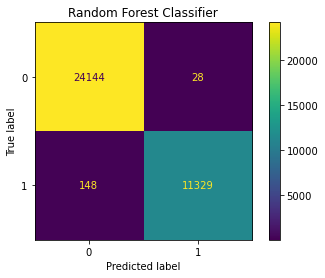

In [286]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.title('Random Forest Classifier')
plt.show()

## Actual and Predicted result from RandomForestClassifier model

In [209]:
y_pred = rfc.predict(X_test)
y_pred
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
111990,0,0
123165,1,1
44058,0,0
76404,0,0
24544,1,1
...,...,...
39500,0,0
1659,0,0
107248,1,1
92444,0,0
